In [329]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import time as t
import datetime as dt
import string as st
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from numpy import genfromtxt
import math as m


In [371]:
def f(x):
    return np.sin(x);

In [386]:
X_matrix = np.genfromtxt('Martrix_X_streamingserver.csv', delimiter=';');
#Y_matrix = np.genfromtxt('Martrix_Y_streamingserver.csv', delimiter=';');
Y_matrix = pd.read_csv('Martrix_Y_streamingserver.csv',sep=';')
y = np.asanyarray(Y_matrix)
X = X_matrix.copy()
X_l = X.tolist();
y_l = y.tolist();

In [372]:
X =np.arange(0.0,10,0.1)


In [373]:
y = f(X)

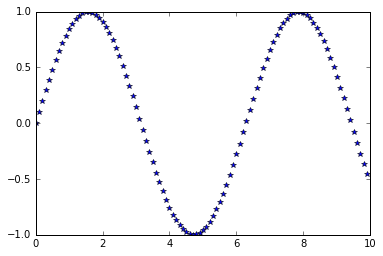

In [374]:
plt.plot(X,y,'b*')


In [375]:
xmin = X.min()
xmax = X.max()
ymin = y.min()
ymax = y.max()
y2 = y.copy()
x2 = X.copy()
x2 -= xmin
x2 /= (xmax-xmin)
y2 -= ymin
y2 /= (ymax-ymin)

In [376]:
import numpy as np
from sklearn.cross_validation import train_test_split 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelBinarizer, MinMaxScaler

#scale the matrix with all the 4 features
xsc = MinMaxScaler(feature_range=(0, 1), copy=True)
xsc.fit(X)
xsc.fit(y)

' xsc will remember the min and max for each feature
X_train, X_test, y_train, y_test = train_test_split(xsc.transform(X), xsc.transform(y))

' our network uses lists (pure Python, no frameworks) so passing numpy arrays 'will fail
X_train_l = X_train.tolist()
y_train_l = y_train.tolist()
X_test_l = X_test.tolist()




# Training vs Testing

In [377]:
x2

array([ 0.        ,  0.01010101,  0.02020202,  0.03030303,  0.04040404,
        0.05050505,  0.06060606,  0.07070707,  0.08080808,  0.09090909,
        0.1010101 ,  0.11111111,  0.12121212,  0.13131313,  0.14141414,
        0.15151515,  0.16161616,  0.17171717,  0.18181818,  0.19191919,
        0.2020202 ,  0.21212121,  0.22222222,  0.23232323,  0.24242424,
        0.25252525,  0.26262626,  0.27272727,  0.28282828,  0.29292929,
        0.3030303 ,  0.31313131,  0.32323232,  0.33333333,  0.34343434,
        0.35353535,  0.36363636,  0.37373737,  0.38383838,  0.39393939,
        0.4040404 ,  0.41414141,  0.42424242,  0.43434343,  0.44444444,
        0.45454545,  0.46464646,  0.47474747,  0.48484848,  0.49494949,
        0.50505051,  0.51515152,  0.52525253,  0.53535354,  0.54545455,
        0.55555556,  0.56565657,  0.57575758,  0.58585859,  0.5959596 ,
        0.60606061,  0.61616162,  0.62626263,  0.63636364,  0.64646465,
        0.65656566,  0.66666667,  0.67676768,  0.68686869,  0.69

In [378]:
inputs = [[i] for i in x2]
targets = [[t] for t in y2]
#inputs

In [389]:
from ann import ANN

# 4 input neurons: sepal length (cm),sepal width (cm), petal length (cm), petal width (cm)
# 10 hidden neurons
# 3 output neurons: setosa [1, 0, 0], versicolor [0, 1, 0], virginica [0, 0, 1]
nn = ANN([1,5,1])


# Here please Try to represent the input data as percentage so that you can capture patterns

# train the ANN
#nn.train(inputs, targets, 1600)
nn.train(X_l,y_l,1000)

(0, 45870.062902070604)
(100, 45862.58305799325)
(200, 45862.58092135661)
(300, 45862.580206421175)
(400, 45862.579848612644)
(500, 45862.5796338688)
(600, 45862.57949070186)
(700, 45862.57938844688)
(800, 45862.57931176483)
(900, 45862.5792521314)


In [380]:
# to uncomment
#example_id = 3
#pred = nn.predict(X_l[example_id])
#print('prediction', pred)





In [381]:
preds = np.array([nn.predict(input)[0] for input in inputs])
preds


array([ 0.90117951,  0.89887864,  0.89636504,  0.89361698,  0.89061045,
        0.88731898,  0.88371337,  0.87976152,  0.87542818,  0.87067471,
        0.86545891,  0.85973482,  0.85345265,  0.84655866,  0.83899526,
        0.83070118,  0.82161178,  0.81165964,  0.80077528,  0.78888831,
        0.77592879,  0.76182898,  0.74652547,  0.72996169,  0.71209066,
        0.69287815,  0.67230579,  0.65037439,  0.62710688,  0.60255096,
        0.57678109,  0.54989962,  0.52203687,  0.49335013,  0.4640214 ,
        0.43425409,  0.40426869,  0.37429776,  0.3445806 ,  0.31535787,
        0.28686657,  0.25933583,  0.23298369,  0.20801541,  0.18462325,
        0.16298824,  0.14328412,  0.12568363,  0.11036772,  0.0975378 ,
        0.08743175,  0.08034358,  0.07664701,  0.07682169,  0.08147973,
        0.09138732,  0.10747178,  0.13079825,  0.16249266,  0.20358142,
        0.25472291,  0.3158344 ,  0.38568765,  0.46164717,  0.53978815,
        0.61553542,  0.68467284,  0.74427702,  0.79313567,  0.83

In [382]:
predsscaled = preds * (ymax-ymin)+ymin

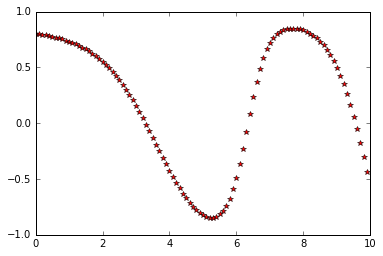

In [383]:
plt.plot(x,predsscaled,'r*')

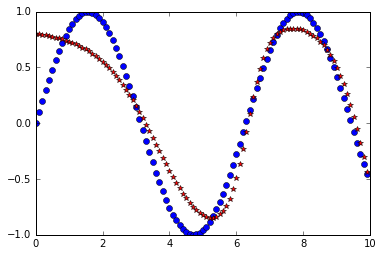

In [384]:
plt.plot(x,y,'bo',x,predsscaled,'r*')

In [385]:

print("prediction error in percentage : ", np.mean((predsscaled - y)**2)*100,"%")

('prediction error in percentage : ', 5.4813035964995089, '%')
